In [1]:
"""   
    this is an example of how to train any dense layer using this library.

"""
print("let us start!")

let us start!


In [2]:
import os
import math
import sys
from Tensor.matrix import Tensor
from nn.linear_nn import Node , Layer , Dense
from initializer.xavier import *
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [3]:
# preparing dataset for training and testing puposes
x , y = make_blobs(n_samples=400, n_features= 2, shuffle=True, random_state=100)
print('shape of x data is ',x.shape)
print('shape of y data is ',y.shape)
#splitting x and y in training and testing data using train_test_split function
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=42)
print('x_train shape is ',x_train.shape)
print('y_train shape is ',y_train.shape)
print('x_test shape is ',x_test.shape)
print('y_test shape is ',y_test.shape)

shape of x data is  (400, 2)
shape of y data is  (400,)
x_train shape is  (320, 2)
y_train shape is  (320,)
x_test shape is  (80, 2)
y_test shape is  (80,)


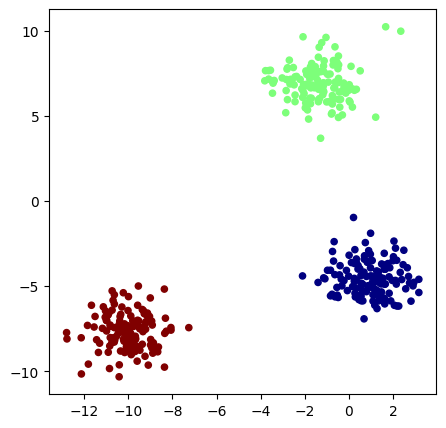

In [4]:
# visualizing data using matplotlib.pyplot
y = y*2 - 1
plt.figure(figsize=(5,5))
plt.scatter(x[:,0], x[:,1], c=y, s=20, cmap='jet') # scatter plot of data in 2D
plt.savefig('data_set_distro.png')

In [5]:
# building dense layer -- a collection of linear layer similar as tensorflow dense layer
model = Dense(n_input=2,list_of_layer=[20,30,1])
print('model is ', model)
params = model.parameters()
print('params is ', params)
print('length of parameters list is ', len(params))

model is  Dense [Layer of [LinearNode2, LinearNode2], Layer of [LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20, LinearNode20], Layer of [LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30, LinearNode30]]
params is  [Tensor(data:-0.16130779873929946,grad:0.0), Tensor(data:0.30828796580184437,grad:0.0), Tensor(data:-0.20268527460227725,grad:0.0), Tensor(data:-0.147408370743919,grad:0.0), Tensor(data:0.5110043037645523,grad:0.0

In [6]:
def sigmoid(y_pred:list):
    final_prob = []
    for i in y_pred:
        data = i.data
        val = 1/(1+np.exp(-data))
        final_prob.append(val)
    return final_prob
    


# defining training function that calculate loss and accuracy model
def loss():

    y_pred = model(x=x_train)
    # print('predicted ouput is ',y_pred)
    # print('length of predicted output is ',len(y_pred))
    # print('actual output is ', y_train)
    # print('length of actual output value is ', len(y_pred))

    # calculating loss 
    loss = 0
    for f1,f2 in zip(y_pred, y_train):
        loss += Tensor(value=abs((f1-f2).data))


    # calculating accuracy using sigmoid function
    prob = sigmoid(y_pred=y_pred)
    correct = 0
    incorrect = 0
    for i in prob:
        if i>0.6:
            correct += 1
        else:
            incorrect += 1
    acc = correct/(correct + incorrect)
    return loss , acc


# loss , acc = loss()
# print('loss of model is ', loss)
# print(f"accuracy of model is , {acc*100}%" )




In [7]:
model.zero_grad()
epochs = 2
for epoch in range(epochs):
    total_loss , acc = loss()
    total_loss.backward()
   # total_loss.visualize_graph(filename=f'dense_layer{epoch}')
    lr = 0.01
    print(model.parameters())
    for param in model.parameters():
        param.data = param.data - lr * param.grad
        param.backward()

    print()
    print()
    print(model.parameters())
    print('loss of model is ', total_loss)
    print(f"accuracy of model is , {acc*100}%" )

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690544 to fit


rendered
[Tensor(data:-0.16130779873929946,grad:0.0), Tensor(data:0.30828796580184437,grad:0.0), Tensor(data:-0.20268527460227725,grad:0.0), Tensor(data:-0.147408370743919,grad:0.0), Tensor(data:0.5110043037645523,grad:0.0), Tensor(data:0.33125892466732687,grad:0.0), Tensor(data:0.23404239675673166,grad:0.0), Tensor(data:0.036167510992064944,grad:0.0), Tensor(data:0.3206973109732483,grad:0.0), Tensor(data:-0.4612822947884857,grad:0.0), Tensor(data:0.07588066133370619,grad:0.0), Tensor(data:0.3765716962906426,grad:0.0), Tensor(data:-0.1967372828991933,grad:0.0), Tensor(data:0.006739282270078029,grad:0.0), Tensor(data:0.36514543798963184,grad:0.0), Tensor(data:-0.3559336310502176,grad:0.0), Tensor(data:0.18928629652591245,grad:0.0), Tensor(data:-0.22293109126381216,grad:0.0), Tensor(data:0.4496809558156647,grad:0.0), Tensor(data:-0.21843404111471776,grad:0.0), Tensor(data:-0.07436442854381387,grad:0.0), Tensor(data:0.10744663421715517,grad:0.0), Tensor(data:0.32360075733645977,grad:0.0),

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.690544 to fit


rendered
[Tensor(data:-0.16130779873929946,grad:0.0), Tensor(data:0.30828796580184437,grad:0.0), Tensor(data:-0.20268527460227725,grad:0.0), Tensor(data:-0.147408370743919,grad:0.0), Tensor(data:0.5110043037645523,grad:0.0), Tensor(data:0.33125892466732687,grad:0.0), Tensor(data:0.23404239675673166,grad:0.0), Tensor(data:0.036167510992064944,grad:0.0), Tensor(data:0.3206973109732483,grad:0.0), Tensor(data:-0.4612822947884857,grad:0.0), Tensor(data:0.07588066133370619,grad:0.0), Tensor(data:0.3765716962906426,grad:0.0), Tensor(data:-0.1967372828991933,grad:0.0), Tensor(data:0.006739282270078029,grad:0.0), Tensor(data:0.36514543798963184,grad:0.0), Tensor(data:-0.3559336310502176,grad:0.0), Tensor(data:0.18928629652591245,grad:0.0), Tensor(data:-0.22293109126381216,grad:0.0), Tensor(data:0.4496809558156647,grad:0.0), Tensor(data:-0.21843404111471776,grad:0.0), Tensor(data:-0.07436442854381387,grad:0.0), Tensor(data:0.10744663421715517,grad:0.0), Tensor(data:0.32360075733645977,grad:0.0),